In [1]:
%matplotlib inline
import config
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
conn = psycopg2.connect(
    host=config.HOST,
    database=config.DATABASE,
    user=config.USER,
    password=config.PASSWORD,
    port=config.PORT)

In [3]:
cur = conn.cursor()

print('PostgreSQL database version:')
cur.execute('SELECT version()')

PostgreSQL database version:


In [4]:
db_version = cur.fetchone()
print(db_version)

('PostgreSQL 12.5 on x86_64-pc-linux-gnu, compiled by gcc (GCC) 4.8.3 20140911 (Red Hat 4.8.3-9), 64-bit',)


In [5]:
sqlQuery = 'SELECT d.ranking, d.countryorregion, d.score, d.perceptionofcorruption, cpi.cpi_score, cpi.rank FROM data_2019 as d INNER JOIN "countryCPI" as cpi ON d.countryorregion = cpi.country WHERE cpi.year = 2019'

In [6]:
cur.execute(sqlQuery)

In [7]:
data = cur.fetchall()

In [8]:
framedData = pd.DataFrame(np.array(data))

In [9]:
conn.close()

In [10]:
print(framedData)

       0            1      2      3   4    5
0      2      Denmark    7.6   0.41  87    1
1      8  New Zealand  7.307   0.38  87    1
2      1      Finland  7.769  0.393  86    3
3     34    Singapore  6.262  0.453  85    4
4      7       Sweden  7.343  0.373  85    4
..   ...          ...    ...    ...  ..  ...
142  108    Venezuela  4.707  0.047  16  173
143  151        Yemen   3.38  0.077  15  177
144  149        Syria  3.462  0.141  13  178
145  112      Somalia  4.668   0.27   9  180
146  156  South Sudan  2.853  0.091  12  179

[147 rows x 6 columns]


In [11]:
framedData.columns = ['Happiness Ranking', 'Country', 'Happiness Score', 'Corruption Perception Score', 'CPI Score', 'CPI Ranking']

In [12]:
print(framedData.head())

  Happiness Ranking      Country Happiness Score Corruption Perception Score  \
0                 2      Denmark             7.6                        0.41   
1                 8  New Zealand           7.307                        0.38   
2                 1      Finland           7.769                       0.393   
3                34    Singapore           6.262                       0.453   
4                 7       Sweden           7.343                       0.373   

  CPI Score CPI Ranking  
0        87           1  
1        87           1  
2        86           3  
3        85           4  
4        85           4  


In [13]:
framedData.dtypes

Happiness Ranking              object
Country                        object
Happiness Score                object
Corruption Perception Score    object
CPI Score                      object
CPI Ranking                    object
dtype: object

In [14]:
framedData['Happiness Ranking'] = pd.to_numeric(framedData['Happiness Ranking'])

In [15]:
framedData['Happiness Score'] = pd.to_numeric(framedData['Happiness Score'])

In [16]:
framedData['Corruption Perception Score'] = pd.to_numeric(framedData['Corruption Perception Score'])

In [17]:
framedData['CPI Score'] = pd.to_numeric(framedData['CPI Score'])

In [18]:
framedData['CPI Ranking'] = pd.to_numeric(framedData['CPI Ranking'])

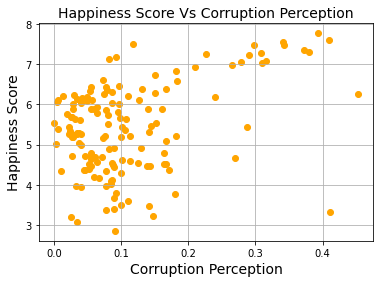

In [19]:
plt.scatter(framedData['Corruption Perception Score'], framedData['Happiness Score'], color='orange')
plt.title('Happiness Score Vs Corruption Perception', fontsize=14)
plt.xlabel('Corruption Perception', fontsize=14)
plt.ylabel('Happiness Score', fontsize=14)
plt.grid(True)

plt.locator_params(axis="x", nbins=6)
plt.locator_params(axis="y", nbins=6)

plt.show()

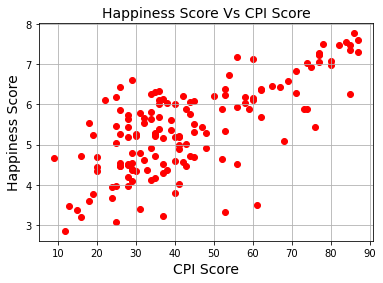

In [20]:
plt.scatter(framedData['CPI Score'], framedData['Happiness Score'], color='red')
plt.title('Happiness Score Vs CPI Score', fontsize=14)
plt.xlabel('CPI Score', fontsize=14)
plt.ylabel('Happiness Score', fontsize=14)
plt.grid(True)
plt.show()

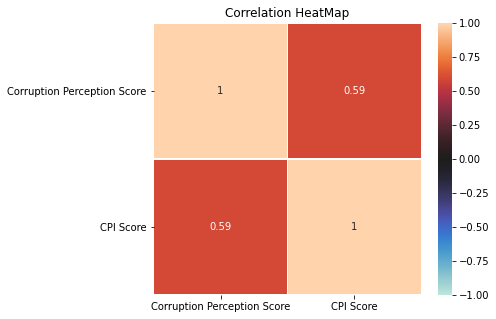

In [21]:
#list of column names to keep
col_names = ['Happiness Score', 'Corruption Perception Score', 'CPI Score']

df = framedData[col_names]

#filtering the dataframe to include just the IV's (features) and another with just the DV's (target)

features = df.loc[:,df.columns != 'Happiness Score']
targets = df.loc[:,df.columns == 'Happiness Score']

#creating pairwise correlation of columns using Pearson's R,
corr = features.corr(method='pearson') 

#plotting the correlation coefficients on a seasborn heatmap matrix
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(corr, annot=True, xticklabels=corr.columns, 
            yticklabels=corr.columns, ax=ax, linewidths=.5, 
            vmin = -1, vmax=1, center=0)

plt.title('Correlation HeatMap')
plt.show()

In [22]:
X = framedData[['Corruption Perception Score', 'CPI Score']]
y = framedData["Happiness Score"].values.reshape(-1, 1)
print(X.shape, y.shape)

(147, 2) (147, 1)


In [23]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X_train, y_train)

score = model.score(X_train, y_train)
print(f"R2 Score: {score}")

R2 Score: 0.49259440256841946


In [25]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [26]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training R2 Score: {training_score}")
print(f"Testing R2 Score: {testing_score}")

Training R2 Score: 0.49259440256841946
Testing R2 Score: 0.5127842213926037


Text(0.5, 1.0, 'Residual Plot')

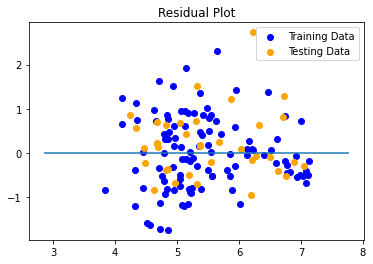

In [27]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [29]:
from sklearn.datasets import make_regression

n_features = 2
X_train, y_train = make_regression(n_samples=147, n_features=n_features, 
                       n_informative=n_features, random_state=42, 
                       noise=0.5, bias=100.0)
print(X_train.shape)

(147, 2)


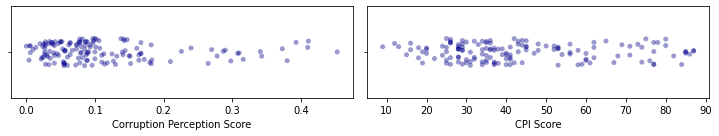

In [31]:
sample_df1 = framedData[['Corruption Perception Score', 'CPI Score']]
plt.figure(figsize=(15, 2))

#function for plotting stripplots given a dataframe
def stripplot_these(df):
    for idx, name in enumerate(df.columns):
        n = idx + 1
        plt.subplot(1,3,n)
        sns.stripplot(x=name, data=df, jitter=0.15, orient= 'h', alpha=.4, color = 'darkblue')
    plt.tight_layout()
    plt.show()

stripplot_these(sample_df1)